In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
warnings.simplefilter('ignore')
import seaborn as sns
import scipy

# Data reading, cleaning and merging

In [2]:
data = pd.read_csv("../summary_data/sbt_features_oncopanel.csv")
data = data.set_index('Sample ID')

data = data.loc[data['Primary Cancer Diagnosis'] == 'Lung Adenocarcinoma', ]

# Dictionary of feature names

In [3]:
feature_dict_names = {'mtDNA_dosage_norm':'mtDNA copy number', '5S_dosage_norm':'5S rDNA copy number', 
                      '18S_dosage_norm':'18S rDNA copy number', '28S_dosage_norm':'28S rDNA copy number', 
                      '45S_dosage_norm':'45S rDNA copy number', 'n_fungi_norm':'fungal load', 
                      'n_microbial_norm':'microbial load', 'n_protozoa_norm':'protozoa load', 
                      'n_viral_norm':'viral load', 'loadIG_ligth_chain_norm':'IG κ and λ infiltration', 
                      'loadIG_norm':'BCR infiltration', 'loadIGH_norm':'IGH infiltration', 
                      'loadIGK_norm':'IG κ infiltration', 'loadIGL_norm':'IG λ infiltration', 
                      'loadTCR_norm':'T cell infiltration', 'loadTCRA_norm':'T cell α infiltration', 
                      'loadTCRB_norm':'T cell β infiltration', 'loadTCRD_norm':'T cell δ infiltration',
                      'loadTCRG_norm':'T cell γ infiltration', 'nIG_ligth_chain_norm':'IG κ and λ richness', 
                      'nIG_norm':'BCR richness', 'nIGH_norm':'IGH richness', 'nIGK_norm':'IG κ richness', 
                      'nIGL_norm':'IG λ richness', 'nTCR_norm':'TCR richness', 'nTCRA_norm':'TCR α richness', 
                      'nTCRB_norm':'TCR β richness', 'nTCRD_norm':'TCR δ richness', 'nTCRG_norm':'TCR γ richness',
                      'alphaIGH':'IGH Shannon', 'alphaIGK':'IG κ Shannon', 'alphaIGL':'IG λ Shannon', 
                      'alphaTCRA':'TCR α Shannon', 'alphaTCRB':'TCR β Shannon', 'alphaTCRD':'TCR δ Shannon', 
                      'alphaTCRG':'TCR γ Shannon'}

# Figure S4

5S rDNA copy number x 18S rDNA copy number (0.6809134819654379, 0.0)


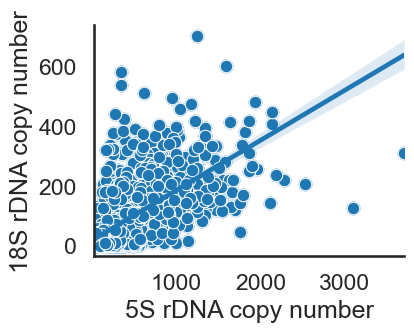

5S rDNA copy number x 28S rDNA copy number (0.6533742684397437, 0.0)


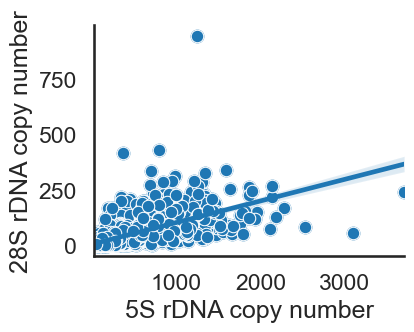

18S rDNA copy number x 28S rDNA copy number (0.8707628817594211, 0.0)


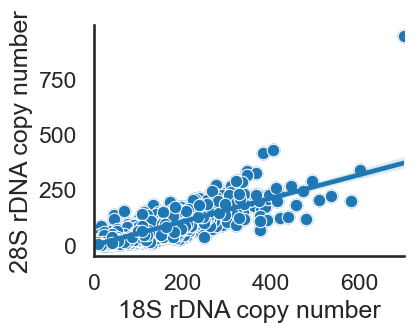

In [4]:
features = ['5S_dosage_norm', '18S_dosage_norm', '28S_dosage_norm']
labels = ['a', 'b', 'c']

sns.set_style("white")
sns.set_context("talk")

i=0
for col in range(0, len(features)):
    for row in range(col+1, len(features)):
        if row != col:
            print(feature_dict_names[features[col]]+" x "+feature_dict_names[features[row]],scipy.stats.pearsonr(data[features[col]],data[features[row]]))
            sns.regplot(x=features[col], y=features[row], data=data)
            g = sns.scatterplot(x=features[col], y=features[row], data=data)    
            sns.despine()
            g.set(xlabel=feature_dict_names[features[col]], ylabel=feature_dict_names[features[row]])
            
            plt.savefig("../figures/FigS4"+labels[i]+"_rdna_correlation.png", bbox_inches="tight")
            plt.show()
            i+=1
            
